# Demo of Ev3DevSim in a Jupyter Notebook


Experiments trying to get [`ev3devsim`](https://www.aposteriori.com.sg/Ev3devSim/index.html) [[code](https://github.com/QuirkyCort/ev3dev-sim)] running in a Jupyter notebook as  [`jp_proxy_widget`](https://github.com/AaronWatters/jp_proxy_widget/blob/master/notebooks/Tutorial.ipynb) proxied `ipywidget`.

In [1]:
# Run this cell to set up the robot simulator environment

#Reset the notebook style
from IPython.core.display import display, HTML

display(HTML("<style>#notebook-container { width:50% !important; float:left !important;}</style>"))


#Launch the simulator
from nbev3devsim import ev3devsim_nb as eds
%load_ext nbev3devsim

testSim = eds.Ev3DevWidget()
display(testSim)
testSim.element.dialog();


Ev3DevWidget(status='Not yet rendered')

__Once the simulator is displayed, drag the corner to make the simulator window larger.__

The simulator is loaded as an `ipywidget` into the notebook and then redered as a JQuery dialog widget.

This has the advantage that the simulator can be resized and moved around the notebook display area. The notebook itself is restyled in a two column display format with the notebook in the left hand column. This provides the area on the right hand side for working in the simulator.

The workflow for using the simulator is as follows:

- code is entered into a block magic code cell and sent ("downloaded") to the simulator;
- the code is then `Run` in the simulator by pressi g the simulator *Run* button;
- charts in the simulator stream data from the sensors in real time as the simulator runs the program (requires sensor data to be sens to simulator output wndow in a particular format); (at the moment, only the ultrasound sensor value is displayed;)
- sensor data can be loaded into the Python context from the simulator and explored via Python.

At the moment the robot is configured by a simulator dialogue but this will move to configuration from a notebook code cell.

There are lots of things to do  which can be found here: [`nbev3devsim/issues`](https://github.com/innovationOUtside/nbev3devsim/issues).

### Example programme
 The following programme demonstrates some elements of the simulator, including inline charting.
 
In the simulator window:

- select the *Grey bands* background from the drop down list;
- check the *Show chart* button;
- check the *Colour* checkbox;
- check the *Pen Down* checkbox.
 
Click in the following code cell to select it and then run the cell. The magic "downloads" the programme to the simulator.

Click on the *Run* button in the simulator to run the program. Click on the *Move* button to move the robot to the specified co-ordinates. You can also click on and drag the center of the simulated robot to move it.

In [2]:
%%sim_magic -s testSim

import playsound

# Sensor_sim
from ev3dev2.motor import MoveTank, SpeedPercent, OUTPUT_B, OUTPUT_C
from ev3dev2.sensor import INPUT_1, INPUT_2, INPUT_3, INPUT_4
from ev3dev2.sensor.lego import ColorSensor


tank_drive = MoveTank(OUTPUT_B, OUTPUT_C)
colorLeft = ColorSensor(INPUT_2)

tank_drive.on(SpeedPercent(50), SpeedPercent(50))

while colorLeft.reflected_light_intensity > 0:
    print('Colour: ' + str(colorLeft.reflected_light_intensity ))
    
playsound.say("All done.")

We can preview the simulator state via a Python environment variable:

In [ ]:
eds.sim_get_data(testSim)

In [34]:
eds.sim_report(testSim)

Python thinks the sim data is: {'x': 1981.1672205330349, 'y': 638, 'angle': 0, 'penDown': False, 'leftWheel': {'polarity': 'normal', 'pos': 3239.6, 'time_sp': 0, 'position_sp': 0, 'speed_sp': 525, 'speed': 525, 'command': 'run-forever', 'state': 'running'}, 'rightWheel': {'polarity': 'normal', 'pos': 3239.6, 'time_sp': 0, 'position_sp': 0, 'speed_sp': 525, 'speed': 525, 'command': 'run-forever', 'state': 'running'}, 'sensor1': [0, 0, 0], 'sensor2': [0, 0, 0], 'gyro': [0, 0], 'ultrasonic': 378}


{'x': 1981.1672205330349,
 'y': 638,
 'angle': 0,
 'penDown': False,
 'leftWheel': {'polarity': 'normal',
  'pos': 3239.6,
  'time_sp': 0,
  'position_sp': 0,
  'speed_sp': 525,
  'speed': 525,
  'command': 'run-forever',
  'state': 'running'},
 'rightWheel': {'polarity': 'normal',
  'pos': 3239.6,
  'time_sp': 0,
  'position_sp': 0,
  'speed_sp': 525,
  'speed': 525,
  'command': 'run-forever',
  'state': 'running'},
 'sensor1': [0, 0, 0],
 'sensor2': [0, 0, 0],
 'gyro': [0, 0],
 'ultrasonic': 378}

We can also get hold of data logged in the simulator as a Python list in the notebook's Python enviironment:

In [23]:
testSim.results_log

[{'index': datetime.datetime(2020, 5, 4, 15, 30, 3, 872921), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 3, 947285), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 1909), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 54476), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 114354), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 245625), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 318795), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 372567), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 422396), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 472611), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 522203), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 572160), 'Colour': 255.0},
 {'index': datetime.datetime(2020, 5, 4, 15, 30, 4, 624

We can cast this into a form we can start working with it.

Long form is perhaps the easiest to work with when charting, particularly if using `seaborn`.

As for the timestamps, it's perhaps easiest to convert them to time deltas rebased from the earliest timestamp we see in the data log.

In [24]:
import pandas as pd

def get_dataframe_from_datalog(datalog):
    """Generate a datafrome from simulator datalog."""
    df = pd.DataFrame(datalog)
    if not df.empty:
        df = df.melt(id_vars='index').dropna()
        df['index'] = pd.to_timedelta(df['index']-df['index'].min())
    return df

df = get_dataframe_from_datalog(testSim.results_log)
df.head()

,index,variable,value
0,00:00:00,Colour,255.0
1,00:00:00.074364,Colour,255.0
2,00:00:00.128988,Colour,255.0
3,00:00:00.181555,Colour,255.0
4,00:00:00.241433,Colour,255.0


In this form we can plot it easily enough using seaborn:

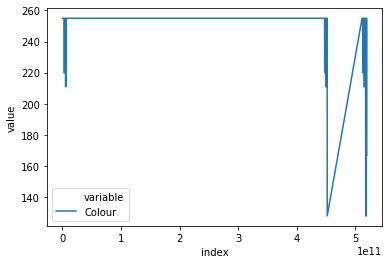

In [25]:
import seaborn as sns
ax = sns.lineplot(x="index", y="value", hue='variable', data=df)

We can also do faceted plots to better cope with different scales.

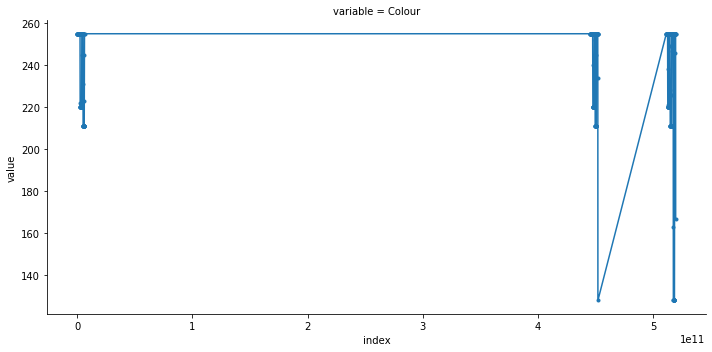

In [26]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, row="variable", height=5, aspect=2, sharey=False)
g = g.map(plt.plot, "index", "value", marker=".");